Привет, Кирилл!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-warning">
    
### Комментарии от ревьюера:
    
#### Совет

Здесь лучше составить небольшое оглавление к проекту. Так он будет выглядеть более целостным.

</div>

<div class="alert alert-info"> <b>Кирилл:</b> Вячеслав, спасибо, согласен, добавил небольшое оглавление ниже</div>

# Аналитический отчет о продаже компьютерных игр 

В рамках проекта предстоит проанализировать исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные содержат информацию до 2016 года. 
Описание данных: 
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Знакомство с данными

In [1]:
# Загрузим библиотеки и исходный датасет 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings


data = pd.read_csv('/datasets/games.csv', sep=",") 
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# Просмотрим общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Проект сохранен в переменную, библиотеки импортированы и получена первичная информация. 
</div 

In [3]:
# Проверим наличие явных дубликатов 
data.duplicated().sum()

0

Наблюдаем несоответствия в названиях столбцов и отсутствие данных.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово. Мы ознакомились с данными и приступаем к их предобработке. 

## Предобработка данных

In [4]:
# Приведем все названия к нижнему регистру 
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Даты выглядят странно, заменим тип данных на целые числа. Избавимся от отсутсвующих значений в "critic_score".Также, сомнения вызывает тип данных в столбце user_score, посмотрим уникальные значения этого столбца

In [5]:
data['genre'] = data['genre'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ты верно делаешь, что заменяешь пропуски значением-заглушкой. Оптимально их никак не заменить в оценках и лучше все оставить как есть или подставить заглушку. 

In [6]:
# Рассмотрим связь параметров между собой, чтобы найти потенцальные значения, которыми можно заполнить пропуски
data[data['critic_score'] != 0].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.002386,0.050745,-0.026317,0.053747,0.011411
na_sales,-0.002386,1.000000,0.840590,0.468787,0.728123,0.240755
eu_sales,0.050745,0.840590,1.000000,0.520103,0.718046,0.220752
jp_sales,-0.026317,0.468787,0.520103,1.000000,0.396889,0.152593
other_sales,0.053747,0.728123,0.718046,0.396889,1.000000,0.198554
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [7]:
# Посмотрим как связаны отсутсвующие значения
data[data['critic_score']== 0].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,0,NaN


In [8]:
# Встречаются значения "tbd" - ознчает, предстоит определить. Посмотрим сколько их:
data[data['user_score'] == "tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


В столбцах с оценками и рейтингом, которые связаны дргуг с другом, практически одинаковое количество пропусков, поэтому заменить средними и медиаными значениями не получится, в данном случае. Значения tbd также заполним нулями, ведь рейтинга еще нет.

In [9]:
data[data['user_score'] == 'tbd'] = 0
data['user_score'] = data['user_score'].astype('float') 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16494 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9999 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [11]:
#Далее оценим сумму продаж игр
#data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


In [12]:
data = data.dropna(subset=['year_of_release'], how='all').reset_index(drop = True)
data['year_of_release'] = data['year_of_release'].astype('int')
data = data[data['year_of_release']!= 0]

#data['year_of_release'] = data['year_of_release'].dropna(how = 'all')
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Пропусков в столбце по году выпуска было менее 2% и проще было их удалить. А еще для суммирования столбцов можешь использовать такой метод `df['x'] = df[['a', 'b', 'c']].sum(axis=1)`

<div class="alert alert-info"> <b>Кирилл:</b> Вячеслав, спасибо, согласен, приходилось постоянно искать способы эти нули исключить. Есть некоторый ступор, вроде-бы можно и хочется удалить данные, но как-будто можешь что-то упустить).Удалил. Также чекнул альернативный способ суммирования по строкам. Работает, спасибо!))</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Супер. Используй на будущее

В результате предобработки удалось привести названия столбцов к единому формату, значения к правильным типам данных, а также избавиться от спецефичных значений. Пропуски могут бысть связаны с техническими неполадками при выгрузке, могут быть связаны с тем, что некоторые игры попросту не оценивались. Общий рейтинг состоит из оценок критиков и пользователей, но в большом количестве игр они отсутствуют. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Промежуточный вывод составлен и высказаны причины возможного возникновения пропусков. Здорово. 

## Исследовательский анализ данных

<AxesSubplot:>

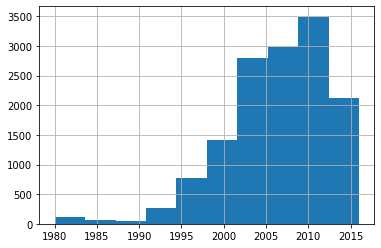

In [13]:
# Рассмотрим сколько игр выпускалось в разные года
data[data['year_of_release']!= 0]['year_of_release'].hist()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный информативный график у тебя получился. По нему мы видим, как ведет себя выпуск платформ с каждым годом. 

Основная масса игр была выпущена после 1991 года. Важные изменения происходят каждые 4 года.

In [14]:
#Рассмотрим топ платформ по суммарным продажам
top_sales = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['count', 'sum'])
top_sales.sort_values(by=[('sum','sum_sales')], ascending=False)

,count,sum
,sum_sales,sum_sales
platform,,
PS2,1891,1171.19
X360,1149,948.74
PS3,1219,921.09
Wii,858,791.91
PS,1146,714.26
DS,1377,655.36
PS4,386,314.00
PSP,1075,273.11


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот и на лидеров по продажам платформ посмотрели

Наиболее прибыльными за все периодаы являются платформы PS2, X360, PS3, Wii и PS. 

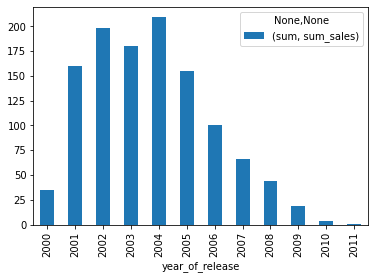

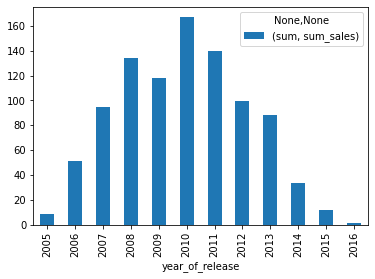

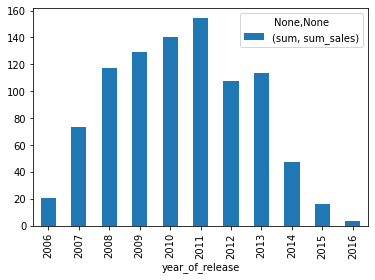

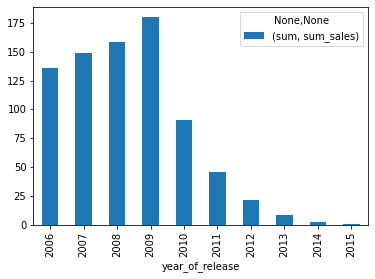

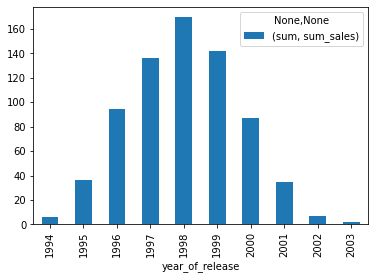

In [15]:
# Рассмотрим как меняются продажи игр на эти платформы во времени
ps_2 = (data
    .query('platform == "PS2"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
x_360 = (data
    .query('platform == "X360"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
ps_3 = (data
    .query('platform == "PS3"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
wii = (data
    .query('platform == "Wii"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
ps = (data
    .query('platform == "PS"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)

for i in [ps_2,x_360,ps_3,wii,ps]:
    i.plot(kind = 'bar')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Автоматизированный метод вывода графиков это хорошо, но тебе можно был оне копипастить каждый раз `(data
    .query('platform == "PS2"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])` а вместо этого через цикл подставлять название платформы. Получилось бы намного компактнее. 

<div class="alert alert-info"> <b>Кирилл:</b> Вячеслав, спасибо, согласен, но я так и не допетрил.
Я уже и двойной цикл прописывал. Остановился на чем-то таком:
    
<r>`platform_top = []
for i in data:
        if i == 'platform':
            for j in i.unique():
               platform_top.append( i = (data.query('platform == "j"').pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])`<r>
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Оставил тебе пример ниже. Используй на будущее:) 

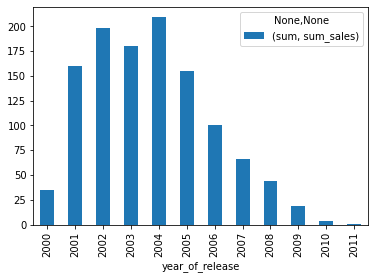

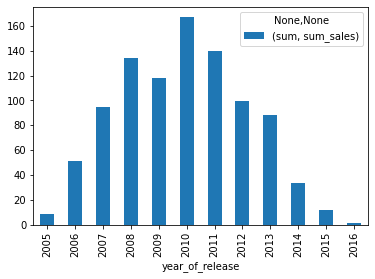

In [26]:
spisok = ['PS2', 'X360']
for i in spisok:
    (data[data['platform'] == i].pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])).plot(kind = 'bar')

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Давай ты уберешь 0 из выборки по годам. Это искусственное значение и лучше смотреть на чистые данные. 

Наблюдается преобладание в продажах на участках 1 - 2  года, далее тенденция снижается, за 4-5 лет платформа может полностью уйти с рынка. К примеру, появление PS3 вытесняет более устаревушю версию PS2, начиная с 2007 года. Для более точного планирования стратегии понадобятся актуальные данные за последние годы. Будем рассматривать период с 2012 по 2016г.

In [164]:
# Приступим к анализу за актуальный период, посмотрим какие платформы лидируют в последнее время
actual_sales = (data
    .query('year_of_release >= 2012').pivot_table(index= 'platform', values = 'sum_sales', aggfunc = ['count','sum'])
               )
actual_sales.sort_values(by=[('sum','sum_sales')], ascending=False)

,count,sum
,sum_sales,sum_sales
platform,,
PS4,386,314.00
PS3,467,287.39
X360,281,235.00
3DS,367,192.71
XOne,236,158.77
WiiU,142,81.79
PC,245,62.56
PSV,404,48.87


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.

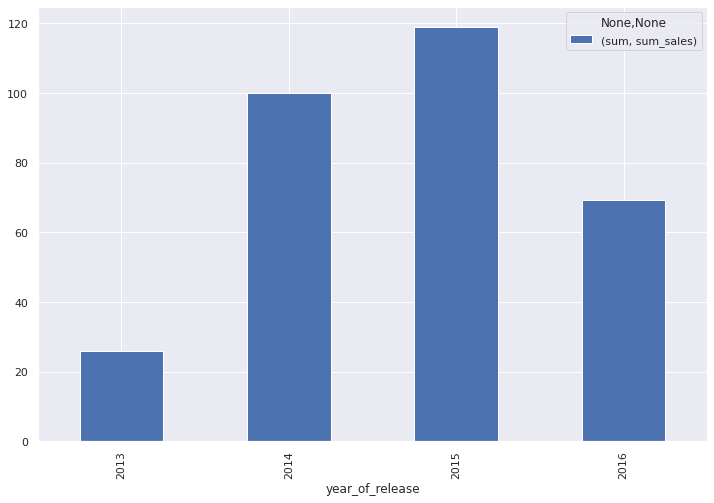

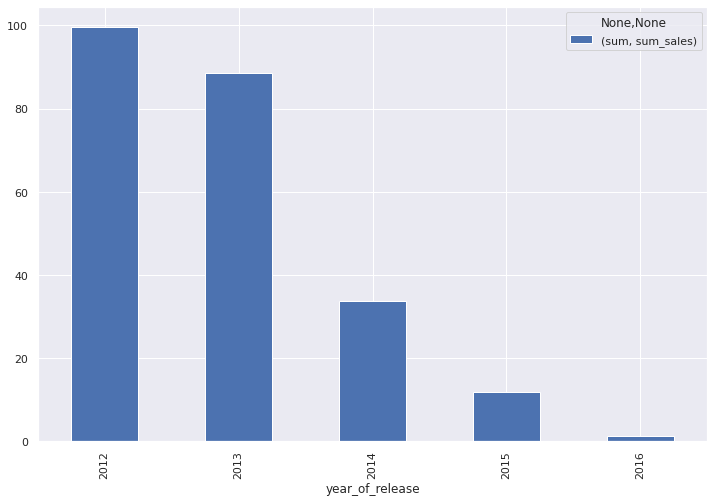

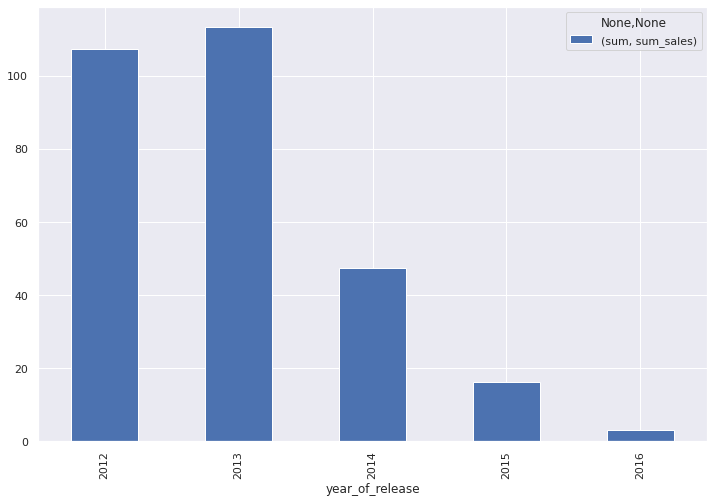

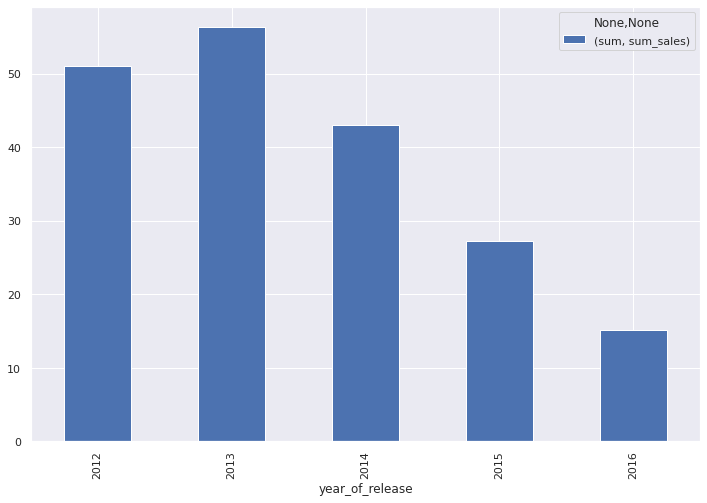

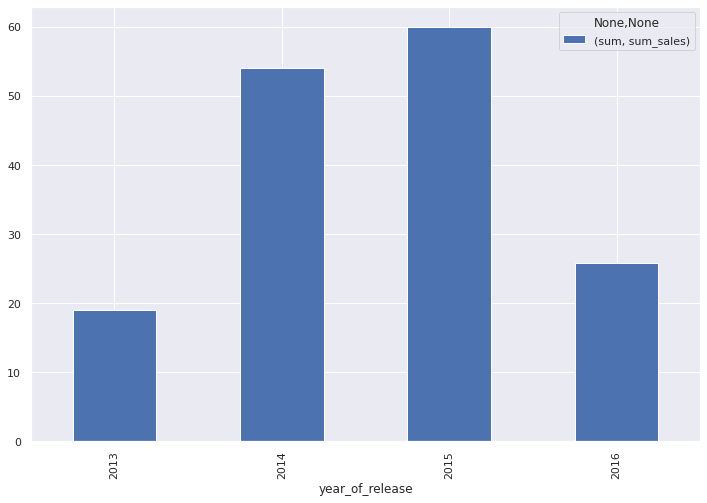

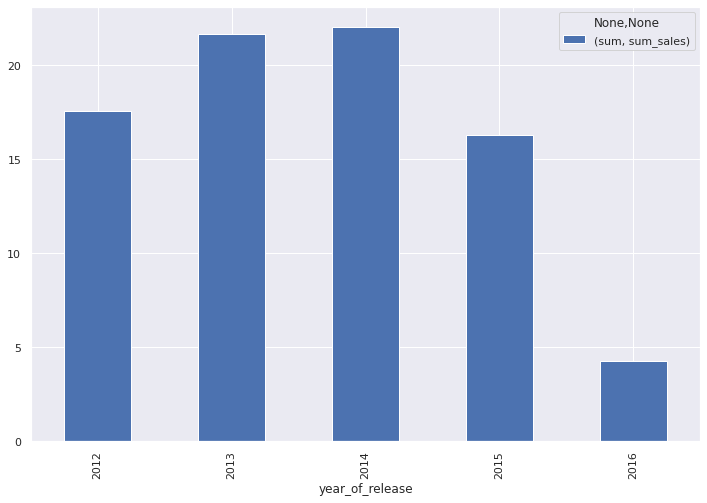

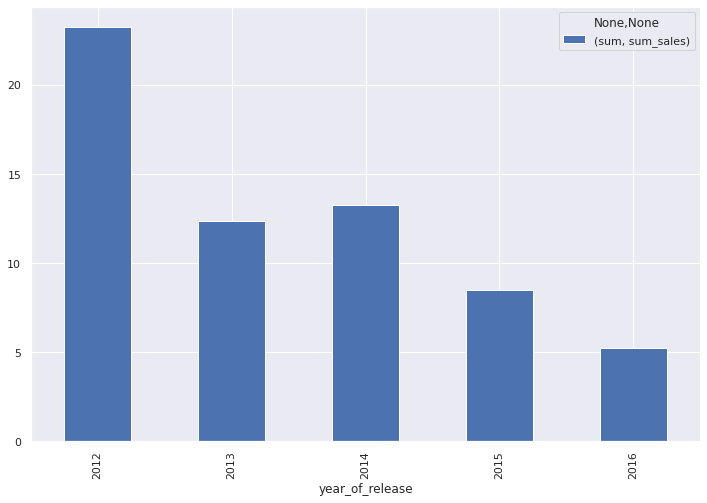

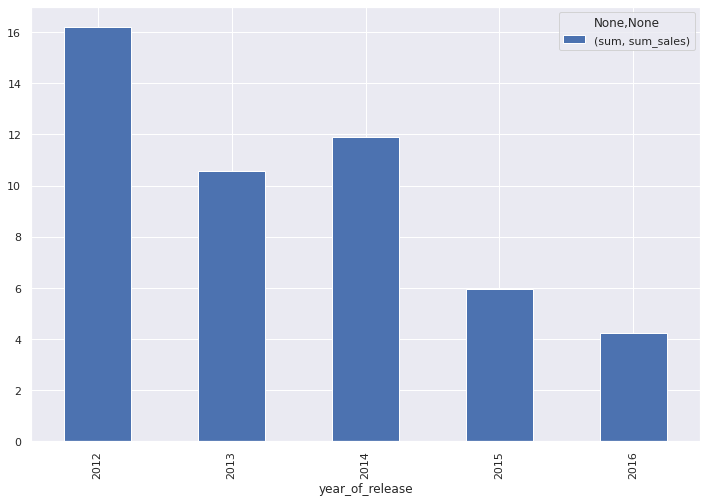

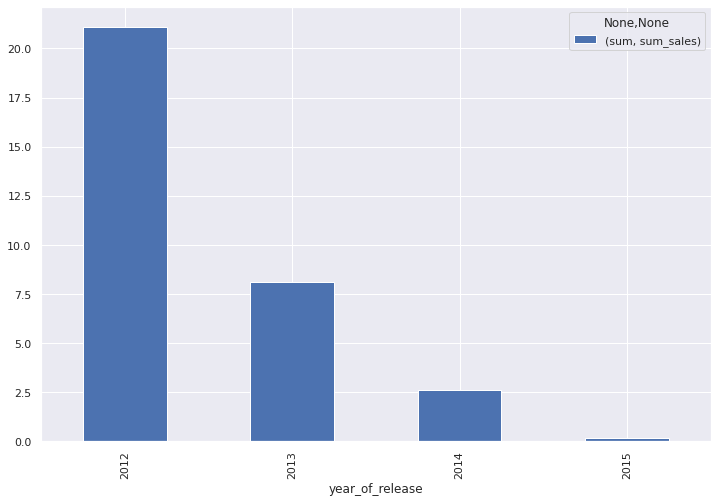

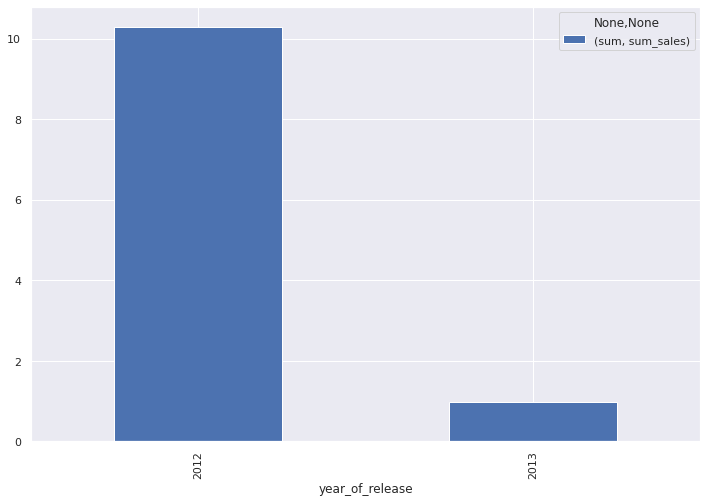

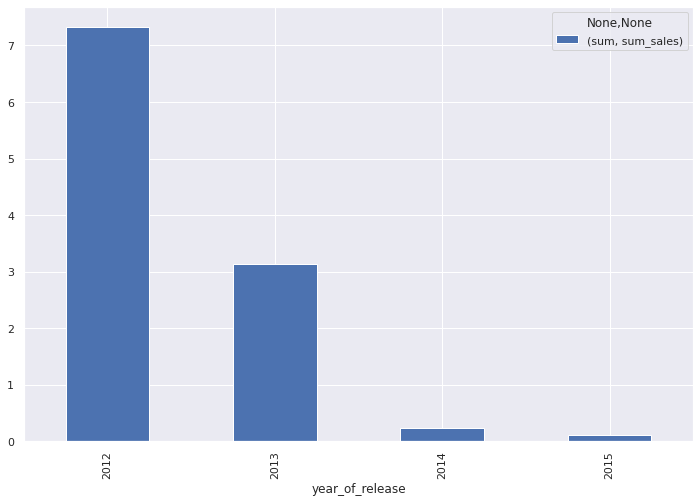

In [165]:
# Рассмотрим динамику каждой платофрмы
ps_4 = (data
    .query('platform == "PS4" & year_of_release >= 2012').
        pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
x_360 = (data
    .query('platform == "X360"& year_of_release >= 2012')
         .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
ps_3 = (data
    .query('platform == "PS3"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
ds_3 = (data
    .query('platform == "3DS"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
x_one = (data
    .query('platform == "XOne"& year_of_release >= 2012')
         .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
wiiu = (data
    .query('platform == "WiiU"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
pc = (data
    .query('platform == "PC"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
psv = (data
    .query('platform == "PSV"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
wii = (data
    .query('platform == "Wii"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
ds = (data
    .query('platform == "DS"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
psp = (data
    .query('platform == "PSP"& year_of_release >= 2012')
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc = ['sum'])
)
#t = ['ps_4','x_360','ps_3','ds_3','x_one', 'wiiu', 'pc', 'psv', 'wii', 'ds', 'psp']
for i in [ps_4,x_360,ps_3,ds_3,x_one, wiiu, pc, psv, wii, ds, psp]:
    i.plot(kind = 'bar')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Аналогично касаемо цикла. 

<div class="alert alert-info"> <b>Кирилл:</b> Понимаю, что есть способ попроще чем я выше описал, что-то упускаю</div>

Набирают популярность следующие платформы: PS4, XOne. Остальные платформы стремительно идут на спад.

In [166]:
#Просмотрим данные
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


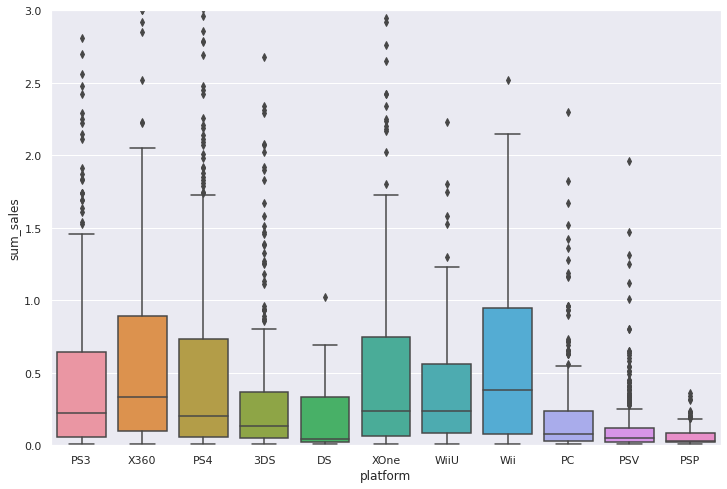

In [167]:
# Построим диаграмму размаха 
sns.boxplot(data=data.loc[data['year_of_release'] >=2012 ] , x = 'platform' , y= 'sum_sales')
plt.ylim(0, 3)
sns.set (rc={'figure.figsize':(12,8)})

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут отдельно хочу выделить то, что ты ограничил вывод выбросов на графике. Теперь нам отчетливо видно медиану и квантили.

Наблюдается большое количество выбросов. У топовых платформ невысокие медианные значения относительно дргуих платформ.  Посмотрим какая связь продаж PS4 и оценками пользователей и критиков.

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14070 entries, 0 to 16493
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14070 non-null  object 
 2   year_of_release  14070 non-null  int64  
 3   genre            14070 non-null  object 
 4   na_sales         14070 non-null  float64
 5   eu_sales         14070 non-null  float64
 6   jp_sales         14070 non-null  float64
 7   other_sales      14070 non-null  float64
 8   critic_score     14070 non-null  float64
 9   user_score       14070 non-null  float64
 10  rating           7442 non-null   object 
 11  sum_sales        14070 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


In [169]:
ps_4 = data.query('platform == "PS4" & (critic_score > 0) & (user_score > 0) & (year_of_release >=2012)')
ps_4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции оценок пользователей: -0.03362497596528878
Коэффициент корреляции оценок критиков: 0.40589480145836687


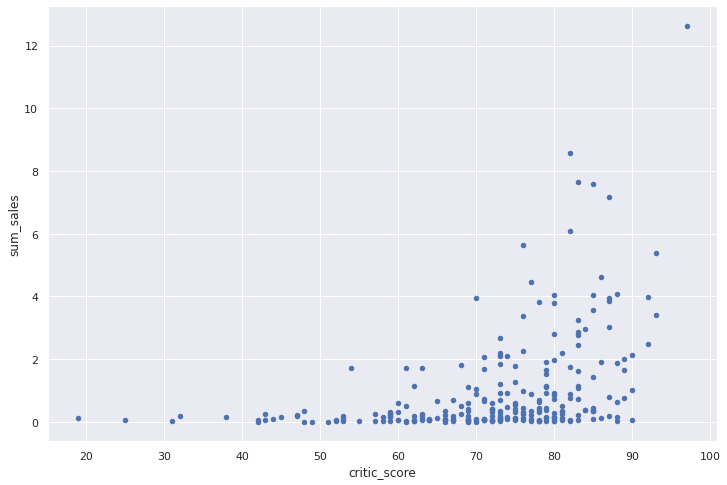

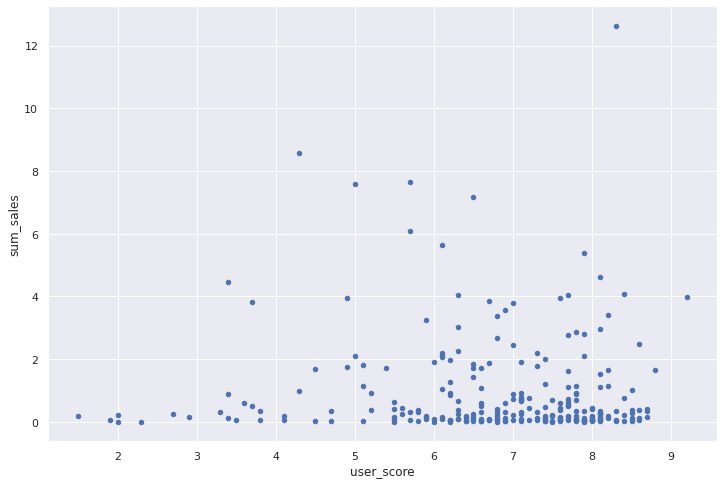

In [170]:
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib import colors
clr = (1,0,0)
clr = colors.to_hex(clr)

ps_4.plot(x='critic_score', y='sum_sales', kind='scatter', grid = True)
ps_4.plot(x='user_score', y='sum_sales', kind='scatter', grid = True)
print('Коэффициент корреляции оценок пользователей:', ps_4['user_score'].corr(ps_4['sum_sales']))
print('Коэффициент корреляции оценок критиков:', ps_4['critic_score'].corr(ps_4['sum_sales']))

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Хороший график для показания зависимости используешь, но тебе незачем считать корреляцию прям для всех столбцов датафрейма. 
    
    
А еще, чтобы убрать красные предупреждения используй `import warnings`
`warnings.filterwarnings("ignore", category=DeprecationWarning)`

<div class="alert alert-info"> <b>Кирилл:</b> Спасибо! Сократил табличку с корреляциями до нужных значений, а ошибки что-то не поддаются</div>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции оценок пользователей: -0.09400318326920852
Коэффициент корреляции оценок критиков: 0.41042203561296375


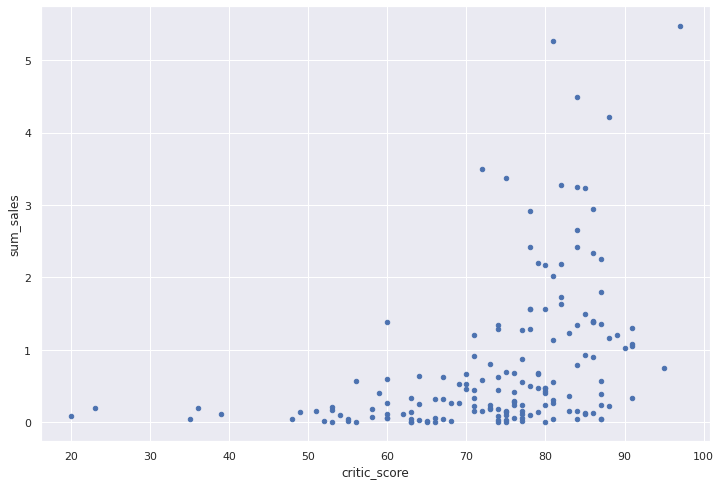

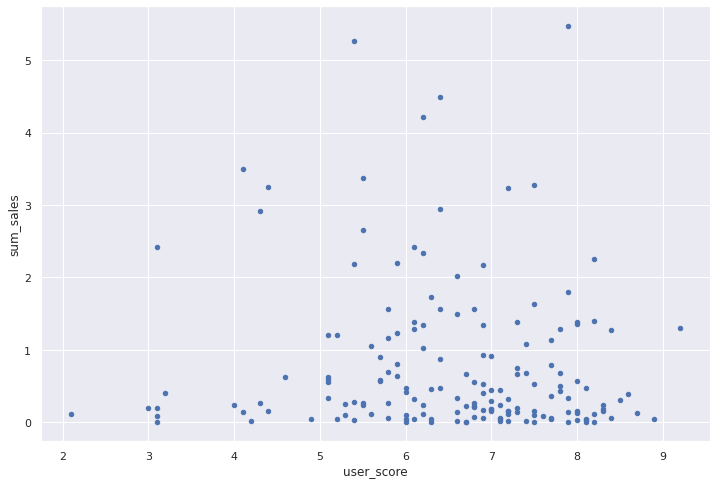

In [171]:
# Также рассмотрим XOne
x_one = data.query('platform == "XOne" & (critic_score > 0) & (user_score > 0) & (year_of_release >=2012)')
x_one.plot(x='critic_score', y='sum_sales', kind='scatter', grid = True)
x_one.plot(x='user_score', y='sum_sales', kind='scatter', grid = True)
print('Коэффициент корреляции оценок пользователей:', x_one['user_score'].corr(x_one['sum_sales']))
print('Коэффициент корреляции оценок критиков:', x_one['critic_score'].corr(x_one['sum_sales']))

Между параметрами не наблюдается сильная корреляци, однако слабая связь присутствует между продажами и оценкой критиков. В области высоких оценок наблюдаются и высокие продажи. Пользователи гораздо охотнее покупают игру, если она имеет высокую оценку критиков, что нельзя сказать про пользовательские оценки, связь отсутсвует. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы на основе данных с нескольких платформ выглядят убедительнее. 

In [172]:
# Посмотрим распределение игр по жанрам
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 0], dtype=object)

<AxesSubplot:xlabel='genre', ylabel='sum_sales'>

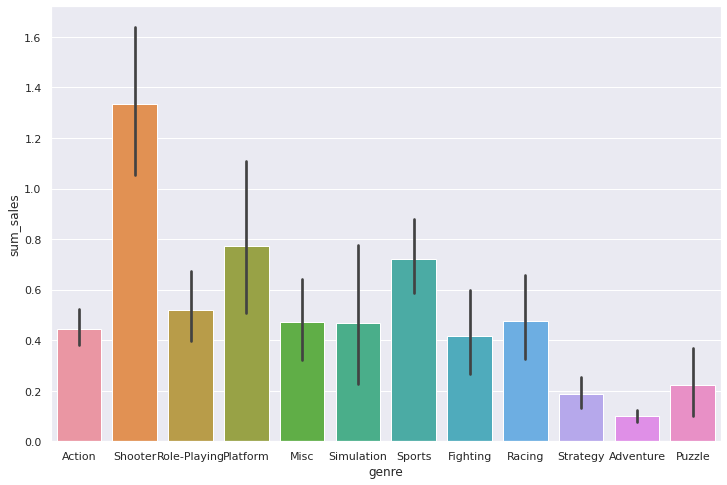

In [173]:
genre_group = data.query('genre!= 0 & (year_of_release >=2012)')
sns.set (rc={'figure.figsize':(12,8)})
sns.barplot(x = genre_group['genre'] , y= genre_group['sum_sales'])

<AxesSubplot:>

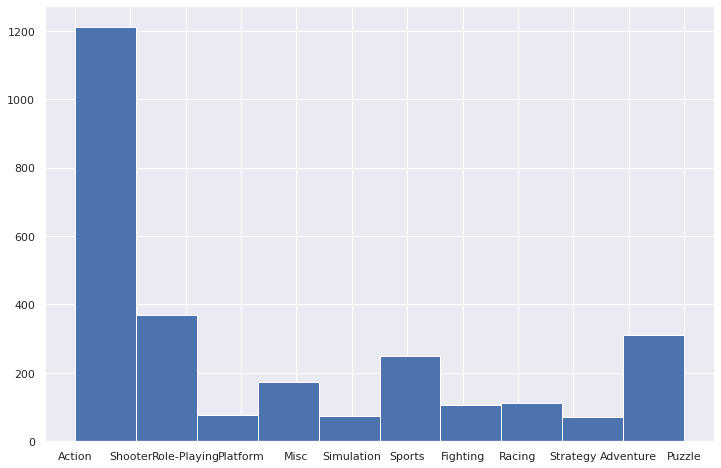

In [174]:
sns.set (rc={'figure.figsize':(12,8)})
genre_group['genre'].hist() # посмотрим общее количество игр по жанрам

Последние 4 года наибольшее число продаж наблюдается в шутерах, а также в платформенных и спортивных играх. Наименьшее в приключенческих играх. Также, стоит отметить, что больше всего игр в категории "экшен" и спортивных играх, но меньше всего можно встретить ролевых игр. 

**Выводы:** Важные изменения в игровой индустрии происходят каждые 4 года. Для прогнозирования стратегии лучше использовать актуальные данные. Наиболее перспективными являются платформы PS4 и XOne. На количество продаж, незначительно, но оказывают влияние оценки критиков. В последнее время огромную популярность имеют шутеры, спортивные и платформенные игры.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По самому прибыльному жанру ты верно определили, что именно Шутеры являются лидером. Поэтому, при определении таких показателей лучше всего смотреть на средние или медианные показатели.

## Региональный анализ продаж

Рассмотрим топ платформ и жанров в каждом регионе

In [175]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


Данные по платформам:

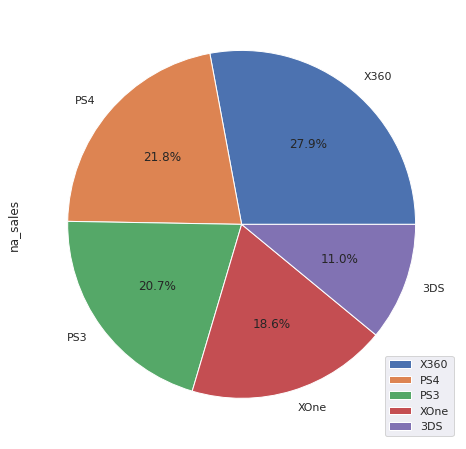

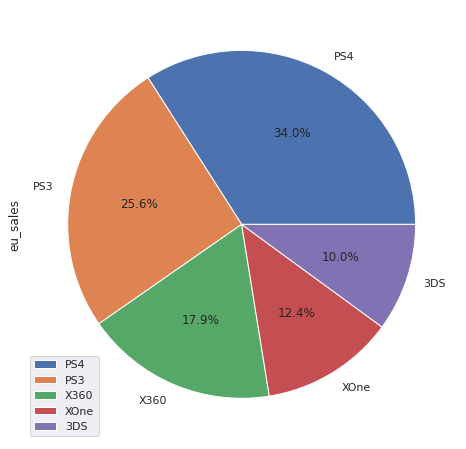

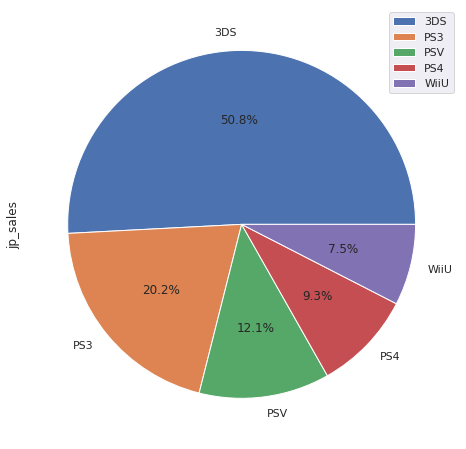

In [176]:
sns.set (rc={'figure.figsize':(12,8)})
na = data.query('year_of_release >=2012').pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'na_sales').head(5)
eu = data.query('year_of_release >=2012').pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'eu_sales').head(5)
jp = data.query('year_of_release >=2012').pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'jp_sales').head(5)

regions = [na, eu, jp]
for i in regions:
    i.plot(kind = 'pie',subplots=True, autopct = '%1.1f%%')

В Европейском и Северо-Американском регионах схожие предпочтения относительно платформ, однако в Европе больше предпочитают платформу PS4, в то время как в Америке Xbox. Наблюдается небольшая разница в процентах. 
Большое отличие от остальных регионов показывает Япония. Так, больше половины всех топовых платформ занимает Nintendo 3DS. Также в топ рейтинг этого региона попали платформы WiiU и PSV, которые являются портативными. Можно заключить, что в подавляющем большенстве случаев, в Японии, предпочтения отдаются портативным платформам.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первое представление о регионах получено. 

Даннные по жанрам:

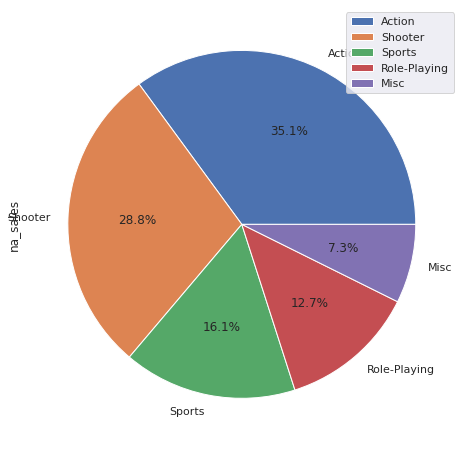

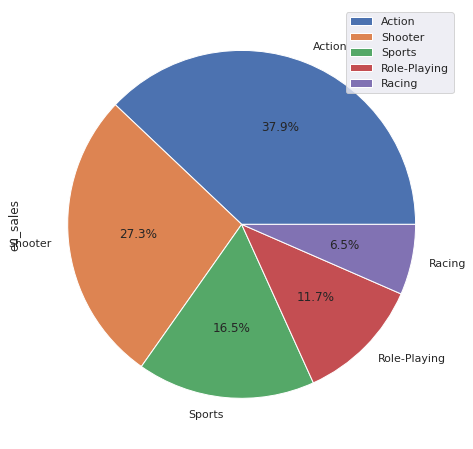

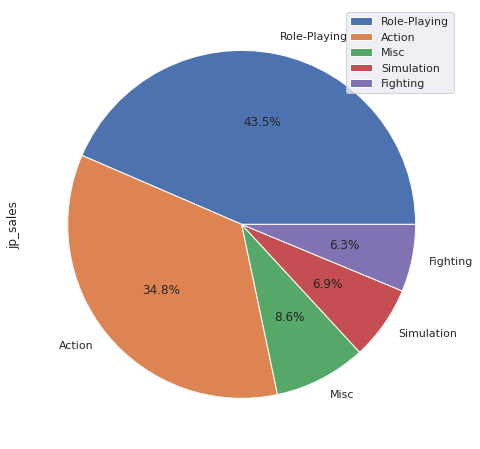

In [177]:
sns.set (rc={'figure.figsize':(12,8)})
na = data.query('year_of_release >=2012').pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'na_sales').head(5)
eu = data.query('year_of_release >=2012').pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'eu_sales').head(5)
jp = data.query('year_of_release >=2012').pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'jp_sales').head(5)

regions = [na, eu, jp]
for i in regions:
    i.plot(kind = 'pie',subplots=True, autopct = '%1.1f%%')

Практически идентичные предпочтения по жанрам наблюдаются в Европейском и Северо-Американском регионах. Так, основными жанрами являются "Экшен", "Шутеры" и"Спортивные игры", в небольшой доле находятся "Ролевые игры". В Японии - напротив, ролевые игры преобладают над остальными жанрами, "Экшен" игры идут следом, также появляются симуляторы и файтинги.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут мы видим, что Япония имеет свою специфику. 

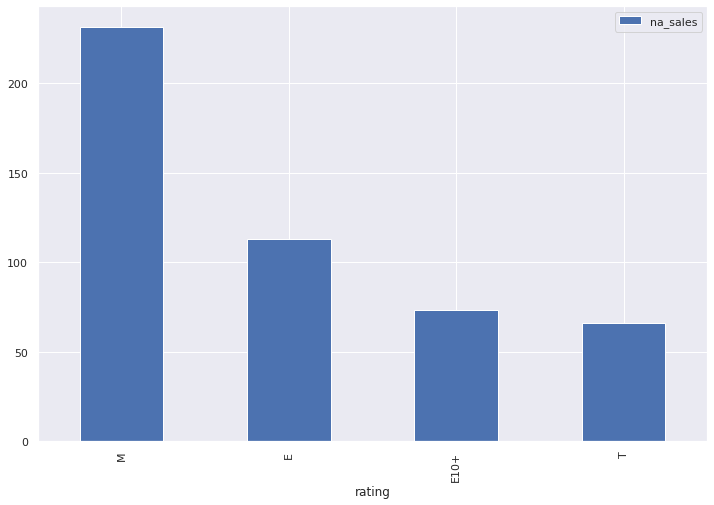

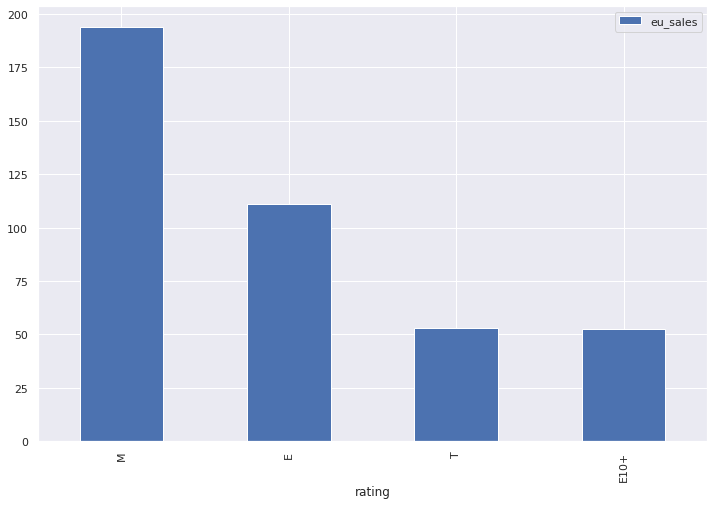

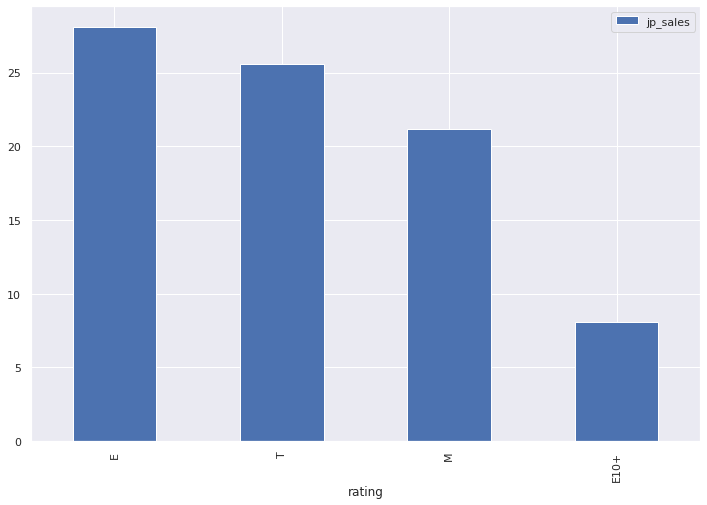

In [178]:
# Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе:
na = data.query('year_of_release >=2012').pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'na_sales').head(8)
eu = data.query('year_of_release >=2012').pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'eu_sales')
jp = data.query('year_of_release >=2012').pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(ascending = False, by = 'jp_sales')

regions = [na, eu, jp]
for i in regions:
    i.plot(kind = 'bar')

В Европейском и Северо-Американском регионах наибольшие продажи наблюдаются в категории игр «M» («Mature») — «Для взрослых» и «E» («Everyone») — «Для всех». В то же время на Японском рынке преобладают игры в категориях «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам».

**Вывод:** Японский регион существенно отличается от схожих Европейского и Северо-Американского. В первую очередь, это касается предпочтений по плафтормам. В Японии предпочитают портативные платформы, в то время как в Северной Америке и Европе - более габаритные варианты, такие как PS4 и Xbox. Также, наблюдается дифференциация по жанрам и влиянию рейтинга ESRB на продажи.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Теперь мы точно будем учитывать региональные особенности, как как каждый из регионов имеет свою уникальность. 

## Проверка гипотез

Проверим гипотезу - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
```
H_0: Пользовательский рейтинг (user_score) платформы Xbox = Пользовательский рейтинг (user_score) платформы PS4
H_1: Пользовательский рейтинг (user_score) платформы Xbox ≠ Пользовательский рейтинг (user_score) платформы PS4
alpha = 0.05
```


In [179]:
# Воспользуемся проверкой для средних двух генеральных совокупностей
#Нулевая гипотеза сформулировалась на основе предположения о том, что рейтинги одинаковы
# Нулевая гипотеза практически всегда предполагает равенство
# Пороговое значение в 5%, явялется достаточным для проверки гипотезы
# Дисперсия скорее всего будет одинаковой т.к. данных одинаковое кол-во

results = st.ttest_ind(
    data.query('year_of_release >=2012 & platform == "PS4" & user_score != 0')['user_score'], 
    data.query('year_of_release >=2012 & platform == "XOne" & user_score != 0')['user_score'])

alpha = 0.05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.10169342039498884
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы и верно определен метод проверки. 

Средние пользовательские рейтинги с очень высокой долей вероятности равны для платформ PS4 и Xbox.

Проверим гипотезу - Средние пользовательские рейтинги жанров Action и Sports разные:
```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = Средний пользовательский рейтинг (user_score) 
жанра Sport
H_1: Средний пользовательский рейтинг (user_score) жанра Action ≠ Средний пользовательский рейтинг (user_score) 
жанра Sport
alpha = 0.05
```

In [180]:
# Воспользуемся проверкой для средних двух генеральных совокупностей
#Нулевая гипотеза сформулировалась на основе предположения о том, что рейтинги жанров могут различаться
# Нулевая гипотеза практически всегда предполагает равенство
# Пороговое значение в 5%, явялется достаточным для проверки гипотезы

results = st.ttest_ind(
    data.query('year_of_release >=2012 & genre == "Action" & user_score != 0')['user_score'], 
    data.query('year_of_release >=2012 & genre == "Sports" & user_score != 0')['user_score'], equal_var = False)

alpha = 0.05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги для жанров Action и Sports - разные.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Ну и с этой гипотезой без сложностей. Здорово.

## Общий вывод


Анализ изменения рынка компьютерных игр в динамике позволил получить следующие выводы:
1. Основная масса игр была выпущена после 1991 года. Важные изменения в индустрии происходят каждые 4 года.
2. Наиболее прибыльными за все периодаы являются платформы PS2, X360, PS3, Wii и PS. 
3. Для более точного планирования стратегии понадобятся актуальные данные за последние годы. В данном случае, с 2012 по 2016 годы. 
4. В рассматриваемом периоде сильно набирают популярность платформы: PS4, XOne. Остальные платформы либо идут на спад, либо не обладают таким потенциалом.
5. Между параметрами оценок и продажами не наблюдается сильная корреляци, однако слабая связь присутствует между продажами и оценкой критиков. В области высоких оценок наблюдаются и высокие продажи. Пользователи гораздо охотнее покупают игру, если она имеет высокую оценку критиков, что нельзя сказать про пользовательские оценки, связь отсутсвует. 
6. Последние 4 года наибольшее число продаж наблюдается в шутерах, а также в платформенных и спортивных играх. Наименьшее в приключенческих играх. Также, стоит отметить, что больше всего игр в категории "экшен" и спортивных играх, но меньше всего можно встретить ролевых игр. 
7. Японский регион существенно отличается от схожих Европейского и Северо-Американского. В первую очередь, это касается предпочтений по плафтормам. В Японии предпочитают портативные платформы, в то время как в Северной Америке и Европе - более габаритные варианты, такие как PS4 и Xbox. Также, наблюдается дифференциация по жанрам и влиянию рейтинга ESRB на продажи. Так, в Европейском и Северо-Американском регионах наибольшие продажи наблюдаются в категории игр «M» («Mature») — «Для взрослых» и «E» («Everyone») — «Для всех». В то же время на Японском рынке преобладают игры в категориях «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам».
8. Проверены гипотезы, в результате которых удалось заключить, что средние пользовательские рейтинги с очень высокой долей вероятности равны для платформ PS4 и Xbox и средние пользовательские рейтинги для жанров Action и Sports - различаются.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тот момент, когда итоговый вывод стал отличным дополнением проекта. У тебя здесь отмечено все то, что удалось обнаружить в результате исследования рыннка видеоигр. С таким выводом смело можем идти к заказчику и защищать результат. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Поздравляю тебя с выполнением твоего первого Сборного проекта. Мне показалось, что работа выполненна прекрасно и ты здорово постарался. Понравилось, что ты хорошо владеешь отличными навыками Предобработки данных и проверки Гипотез. А еще особенно ценно, что ты везде пишешь аргументацию своим действиям. Так, если проект попадет в руки незнакомому человеку, он сможет разобраться. Это тебе очень пригодится в будущем.

В проекте осталось небольшое замечение:
    
* Убрать 0 при просмотре распределения графиков по годам. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
    
    
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-info"> <b>Кирилл:</b> Вячеслав, большое спасибо за ревью! Большой и терпеливый труд!
Критические замечания исправил, но не все рекомендательные удалось побороть.</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его принимаю и желаю тебе успехов в дальнейшей учебе. Ты точно справишься и дальше, я уверен в этом. 